## Necessary Libraries and Constants

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import random
import string
import hmac

e = 2**52
salt = "0000000000000000000fa3b65e43e4240d71762a5bf397d5304b2596d116859c"

## Get Result and Get Previous Game Function

In [2]:
game_hash = '100af1b49f5e9f87efc81f838bf9b1f5e38293e5b4cf6d0b366c004e0a8d9987'

def get_result(game_hash):
    hm = hmac.new(str.encode(game_hash), b'', hashlib.sha256)
    hm.update(salt.encode("utf-8"))
    h = hm.hexdigest()
    if (int(h, 16) % 33 == 0):
        return 1
    h = int(h[:13], 16)
    e = 2**52
    return (((100 * e - h) / (e-h)) // 1) / 100.0

def get_prev_game(hash_code):
    m = hashlib.sha256()
    m.update(hash_code.encode("utf-8"))
    return m.hexdigest()

## Collecting All Game Results

In [3]:
game_hash = '100af1b49f5e9f87efc81f838bf9b1f5e38293e5b4cf6d0b366c004e0a8d9987' # Update to latest game's hash for more results
first_game = "77b271fe12fca03c618f63dfb79d4105726ba9d4a25bb3f1964e435ccf9cb209"

results = []
count = 0
while game_hash != first_game:
    count += 1
    results.append(get_result(game_hash))
    game_hash = get_prev_game(game_hash)
    
results = np.array(results)

In [12]:
print(count)

618990


## Testing Probability Formula

In [4]:
multiplier = 1.99
(results <= multiplier).mean(), 1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier))

(0.5170600494353705, 0.5175879396984926)

## Testing Expected Value Formula

In [5]:
multiplier = 1.05
((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01))))*-1 + (multiplier-1)*(1 - ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01)))))

-0.03076923076923082

In [6]:
(results < multiplier).mean() * -1 + (multiplier - 1)*(results >= multiplier).mean()

-0.03061551882906021

## Visualizations

Text(0.5, 0, 'Multiplier')

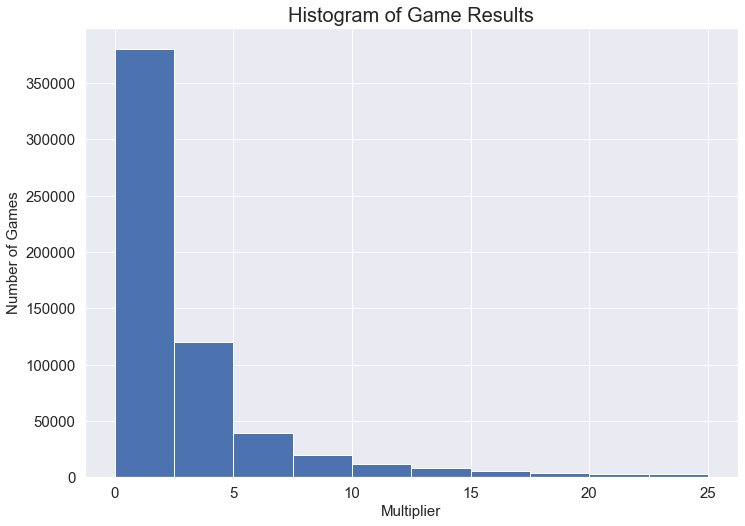

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.hist(results, range=(0, 25))
plt.title("Histogram of Game Results", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Games", fontsize=15)
plt.xlabel("Multiplier", fontsize=15)

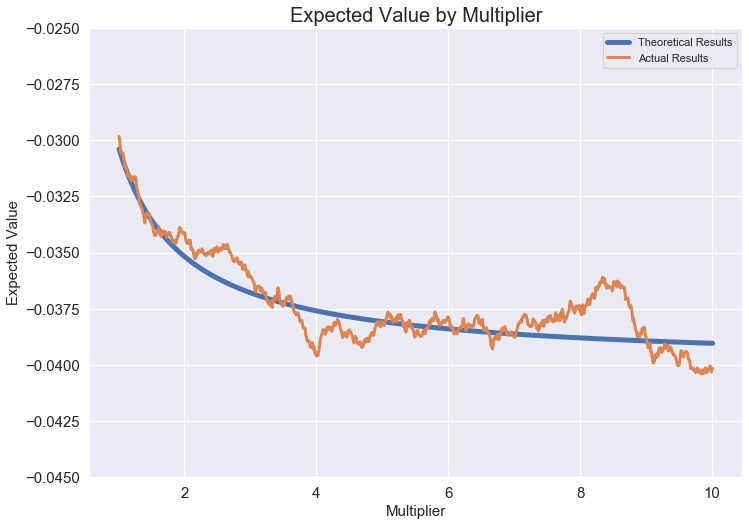

In [24]:
def calculate_ev(multiplier):
    return ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01))))*-1 + (multiplier-1)*(1 - ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01)))))

xs = np.linspace(101, 1001, 901) / 100
ys = [calculate_ev(x) for x in xs]
y2s = [(results < x).mean() * -1 + (x - 1)*(results >= x).mean() for x in xs]

plt.plot(xs, ys, linewidth=5)
plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Expected Value", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.045, -.025)
plt.plot(xs, y2s, linewidth=3)
plt.title("Expected Value by Multiplier", fontsize=20)
plt.legend(["Theoretical Results", "Actual Results"])

## Martingale Test

In [25]:
negatives = []
in_a_row = 0
for multiplier in results:
    if multiplier < 2:
        in_a_row += 1
    else:
        in_a_row = 0
    negatives.append(in_a_row)
negatives = np.array(negatives)

In [26]:
for i in range(1, 14):
    print("Probability of Losing %d Game(s) in a Row:"%i, (negatives >= i).mean())

Probability of Losing 1 Game(s) in a Row: 0.5170600494353705
Probability of Losing 2 Game(s) in a Row: 0.2671222475322703
Probability of Losing 3 Game(s) in a Row: 0.13786652449958803
Probability of Losing 4 Game(s) in a Row: 0.07155042892453836
Probability of Losing 5 Game(s) in a Row: 0.03690528118386403
Probability of Losing 6 Game(s) in a Row: 0.018866217547941
Probability of Losing 7 Game(s) in a Row: 0.0096092020872712
Probability of Losing 8 Game(s) in a Row: 0.004901533142700205
Probability of Losing 9 Game(s) in a Row: 0.002457228711287743
Probability of Losing 10 Game(s) in a Row: 0.0012504240779334078
Probability of Losing 11 Game(s) in a Row: 0.0006074411541381929
Probability of Losing 12 Game(s) in a Row: 0.00028594969224058546
Probability of Losing 13 Game(s) in a Row: 0.00012439619379957673
